# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rahmah Fauziah
- **Email:** rahmahfzh1805@gmail.com
- **ID Dicoding:** MC299D5X1751

## Menentukan Pertanyaan Bisnis

- Bagaimana performa sewa sepeda dalam rentang waktu per bulan?
- Berapa nilai tertinggi dan terendah pengguna dalam menyewa sepeda dalam rentang waktu 1 bulan pada tahun 2011?

## Import Semua Packages/Library yang Digunakan

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [58]:
day_df = pd.read_csv("https://raw.githubusercontent.com/rahmahff/rahmah-proyek-akhir/refs/heads/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [59]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/rahmahff/rahmah-proyek-akhir/refs/heads/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menambahkan data tabel **'day'** dari dataset Bike Sharing melalui tautan yang diperoleh dari hasil upload dataset di Github
- Menambahkan data tabel **'hour'** dari dataset Bike Sharing melalui tautan yang diperoleh dari hasil upload dataset di Github

### Assessing Data

In [60]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [61]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [62]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [63]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Melakukan proses penilaian data dengan meninjau apakah terdapat *missing value*, duplikasi, dan tipe data yang kurang sesuai melalui *method* **info()** pada tabel **day_df** dan **hour_df**
- Untuk mengetahui apakah terdapat duplikasi data menggunakan fungsi **duplicated()**
- Terdapat tipe data yang kurang sesuai pada kolom *dteday* yang seharusnya menggunakan tipe data *datetime* bukan **integer**

### Cleaning Data

In [64]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [65]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Melakukan perubahan tipe data pada kolom *dteday* menjadi *datetime*
- Prose perubahan tipe data melibatkan library pandas yaitu **pd.to_datetime**

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [66]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [67]:
day11_df = day_df[day_df["yr"] == 0]
day11_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [68]:
day11_exp_df = day11_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})
day11_exp_df.head(12)

,casual,registered,cnt
mnth,,,
1,3073,35116,38189
2,6242,41973,48215
3,12826,51219,64045
4,22346,72524,94870
5,31050,104771,135821
6,30612,112900,143512
7,36452,104889,141341
8,28842,107849,136691
9,26545,100873,127418


In [69]:
day12_df = day_df[day_df["yr"] == 1]
day12_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [70]:
day12_exp_df = day12_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})
day12_exp_df.head(12)

,casual,registered,cnt
mnth,,,
1,8969,87775,96744
2,8721,94416,103137
3,31618,133257,164875
4,38456,135768,174224
5,44235,151630,195865
6,43294,159536,202830
7,41705,161902,203607
8,43197,171306,214503
9,43778,174795,218573


### Explore Data hour_df

In [71]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [72]:
hour_mnth_df = hour_df[(hour_df["mnth"] == 1) & (hour_df["yr"] == 0)]
hour_mnth_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [73]:
hour_exp_df = hour_mnth_df.groupby(["hr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})
hour_exp_df.head(24)

,,casual,registered,cnt
hr,mnth,,,
0,1,45,393,438
1,1,37,258,295
2,1,19,178,197
3,1,22,72,94
4,1,6,38,44
5,1,2,104,106
6,1,12,503,515
7,1,44,1429,1473
8,1,87,3462,3549


### Explore Data all_df

In [74]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melakukan eksplorasi terhadap data tabel **day** dan **hour**
- Pada data kedua tabel ditinjau nilai mean, min, max, dan sebagainya melalui method **describe(include="all")**
- Pada data tabel **day** dilakukan filter data untuk mendapatkan data masing-masing tahun dan dilakukan pengelompokkan data melalui method **groupby**
- Pada data tabel **hour** dilakukan filter data berdasarkan kategori bulan ke-1 dan tahun 2011, serta melakukan proses pengelompokkan data berdasarkan jam dan bulan
- Untuk itu melakukan proses eksplorasi data secara keseluruhan melalui proses penggabungan data menggunakan fungsi **left** berdasarkan kolom **instant**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa sewa sepeda dalam rentang waktu per bulan?

In [75]:
day11_sort_df = day11_exp_df.groupby(["mnth"]).agg({
    "cnt": "sum",
}).reset_index()
day11_sort_df.head(12)

,mnth,cnt
0,1,38189
1,2,48215
2,3,64045
3,4,94870
4,5,135821
5,6,143512
6,7,141341
7,8,136691
8,9,127418
9,10,123511


In [76]:
day12_sort_df = day12_exp_df.groupby(["mnth"]).agg({
    "cnt": "sum",
}).reset_index()
day12_sort_df.head(12)

,mnth,cnt
0,1,96744
1,2,103137
2,3,164875
3,4,174224
4,5,195865
5,6,202830
6,7,203607
7,8,214503
8,9,218573
9,10,198841


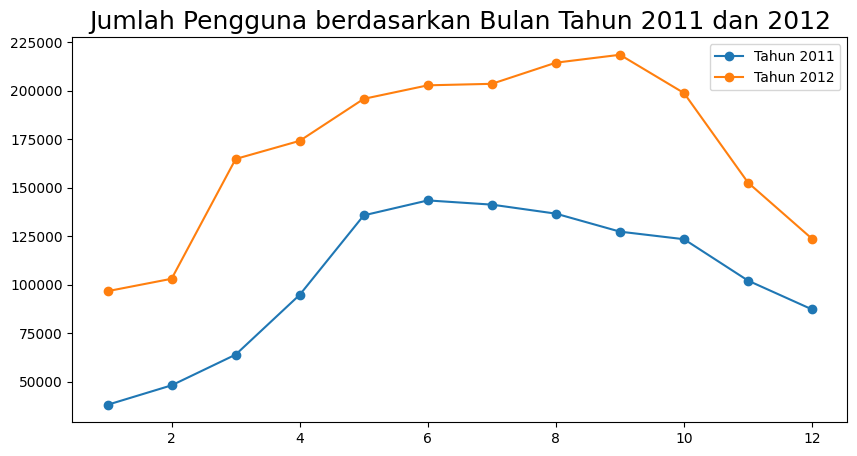

In [77]:
day11_line_df = day11_sort_df[["mnth", "cnt"]]
day12_line_df = day12_sort_df[["mnth", "cnt"]]

plt.figure(figsize=(10, 5))
plt.plot(day11_line_df["mnth"], day11_line_df["cnt"], label = "Tahun 2011", marker='o')
plt.plot(day12_line_df["mnth"], day12_line_df["cnt"], label = "Tahun 2012", marker='o')
plt.legend()
plt.title("Jumlah Pengguna berdasarkan Bulan Tahun 2011 dan 2012", loc="center", fontsize=18)
plt.show()

### Pertanyaan 2: Berapa nilai tertinggi dan terendah pengguna dalam menyewa sepeda dalam rentang waktu 1 bulan pada tahun 2011?

In [78]:
hour_sort_df = hour_exp_df.groupby(["hr"]).agg({
    "cnt": "sum",
})
hour_sort_df.head(24).sort_values(by="cnt", ascending=False)

,cnt
hr,
17,4028
8,3549
18,3480
16,2596
19,2526
9,2380
13,2218
15,2207
12,2179


In [79]:
hour_sort_df = hour_sort_df.reset_index()

hour_sort_df.head()

,hr,cnt
0,0,438
1,1,295
2,2,197
3,3,94
4,4,44


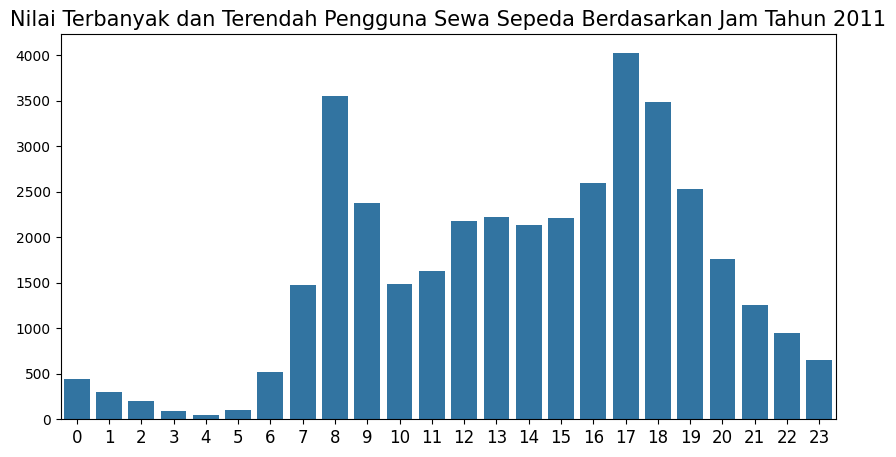

In [80]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour_sort_df.sort_values(by="cnt", ascending=False),
)
plt.title("Nilai Terbanyak dan Terendah Pengguna Sewa Sepeda Berdasarkan Jam Tahun 2011", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Pada pertanyaan 1 dilakukan pengelompokkan data menggunakan method **groupby** berdasarkan kolom **mnth**
- Pada pertanyaan 1 dilakukan visualisasi data untuk mengetahui performa sewa sepeda berdasarkan jumlah pengguna setiap bulannya, menggunakan fungsi **plot** agar menghasilkan visualisasi data dalam bentuk **line chart**
- Pada pertanyaan 2 dilakukan pengelompokkan data menggunakan method **groupby** berdasarkan kolom **hr** dengan melakukan pengurutan data berdasarkan nilai terbesar dengan menggunakan fungsi **ascending=False**
- Pada pertanyaan 2 dilakukan visualisasi data untuk mengetahui nilai terbesar dan terkecil dalam menyewa sepeda berdasarkan waktu selama 24 jam pada bulan pertama di tahun 2011, menggunakan fungsi **barplot**

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan analisis performa sewa sepeda dalam rentang waktu per bulan, diketahui bahwa terdapat peningkatan total pengguna dari **casual** dan **registered** pada tahun 2012 dibandingkan tahun 2011. Namun, terdapat peningkatan yang cukup signifikan pada tahun 2011 di bulan **Februari - Mei**. Meskipun demikian, peningkatan yang unggul masih berada pada tahun 2012. Hal ini membuktikan bahwa performa penyewaan sepeda pada kurun waktu 2 tahun tersebut mengalami peningkatan yang signifikan, terutama pada September tahun 2012 memiliki nilai total pengguna sewa sepeda yang cukup tinggi.
- Conclution pertanyaan 2 : Berdasarkan analisis nilai tertinggi dan terendah pengguna dalam menyewa sepeda dalam rentang waktu 1 bulan pada tahun 2011, diketahui bahwa pengguna lebih banyak menyewa sepeda pada sore hari tepatnya sekitar pukul 17. Hal tersebut dibuktikan melalui hasil visualisasi data, menunjukkan jumlah total pengguna **casual dan registered** yang menyewa sepeda pada pukul 17 sebanyak 4028. Nilai kedua terbanyak sewa sepeda pada pukul 8 pagi sebanyak 3549. Untuk nilai terendah yang menyewa sepeda ada pada pukul 4 pagi, dengan total sebesar 44 pengguna. Hal tersebut membuktikan bahwa pada bulan Januari tahun 2011, pengguna lebih sering menyewa sepeda pada rentang waktu pagi hari hingga malam hari dibandingkan dengan dini hari yang cukup sepi peminat dalam sewa sepeda.

In [81]:
#Fungsi download data ke dalam bentuk csv
all_df.to_csv("main_data.csv", index=False)